<a href="https://colab.research.google.com/github/vinicius-souza-lima/mvp_ADBP/blob/main/MVP_ADBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requisitos

## Requisitos e composição da nota:

*   (1,0 pt) Execução sem erros:o notebook deve poder ser executado pelo professor do início ao fim sem erros.
*   (2,0 pts) Documentação consistente:utilize blocos de texto que expliquem textualmente cada etapa e cada decisão do seu código, contando uma história completa e compreensível, do início ao fim.
*   (1,0 pt) Código limpo:seu código deve estar legível e organizado. Devem ser utilizadas as boas práticas de codificação vistas nas disciplinas Programação orientada a objetose Engenharia de software para ciência de dados, mas não é necessário que você crie classes no seu código.
*   (2,0 pts) Análise de dados:após cada gráfico, você deverá escrever um parágrafo resumindo os principais achados, analisando os resultados e levantando eventuais pontos de atenção.
*   (2,0 pts) Checklist:você deverá responder às perguntas (aplicáveis ao seu dataset) da checklist fornecida, utilizando-a como guia para o desenvolvimento do trabalho.
*   (2,0 pts) Capricho e qualidade do trabalho como um todo.







## Definição do problema
Objetivo: entender e descrever claramente o problema que está sendo resolvido.

Qual é a descrição do problema?

Dado um conjunto de características do meu jogo,quero prever como será seu resultado na Steam.

Este é um problema de aprendizado supervisionado ou não supervisionado?

Supervisionado


Que premissas ou hipóteses você tem sobre o problema?
Que restrições ou condições foram impostas para selecionar os dados?
Defina cada um dos atributos do dataset.

## Análise de dados
Objetivo: entender a informação disponível.

Estatísticas descritivas:

Quantos atributos e instâncias existem?
Quais são os tipos de dados dos atributos?
Verifique as primeiras linhas do dataset. Algo chama a atenção?
Há valores faltantes, discrepantes ou inconsistentes?
Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

## Visualizações:

Verifique a distribuição de cada atributo. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).
Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.
Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.

## Pré-processamento de dados:
Objetivo: realizar operações de limpeza, tratamento e preparação dos dados.

Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).
Trate (removendo ou substituindo) os valores faltantes (se existentes).
Realize outras transformações de dados porventura necessárias.
Explique, passo a passo, as operações realizadas, justificando cada uma delas.
Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.

# Introdução


Nome:Vinícius de Souza Lima.

Link para o Reposítório: [MVP Análise de Dados e Boas Práticas](https://github.com/vinicius-souza-lima/mvp_ADBP)


Foi utilizado um dataset proveniente do Kaggle, [Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download), o qual traz informações de mais de 85.000 jogos publicados na Steam, a maior plataforma de jogos de PC do mercado.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [3]:
# Upload dos dados com carga do dataset através da url
games = pd.DataFrame({})
for i in range(10):
  url_dados = 'https://raw.githubusercontent.com/vinicius-souza-lima/mvp_ADBP/main/dataset/games-'+ str(i+1) + '.csv'
  games = pd.concat([games,pd.read_csv(url_dados)]).drop(columns = ["AppID","Screenshots","Movies",
                                                                    "Metacritic url","Header image","Website",
                                                                    "Support url", "Support email"])


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85103 entries, 0 to 8494
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        85097 non-null  object 
 1   Release date                85103 non-null  object 
 2   Estimated owners            85103 non-null  object 
 3   Peak CCU                    85103 non-null  int64  
 4   Required age                85103 non-null  int64  
 5   Price                       85103 non-null  float64
 6   DLC count                   85103 non-null  int64  
 7   About the game              81536 non-null  object 
 8   Supported languages         85103 non-null  object 
 9   Full audio languages        85103 non-null  object 
 10  Reviews                     9743 non-null   object 
 11  Windows                     85103 non-null  bool   
 12  Mac                         85103 non-null  bool   
 13  Linux                       85103 non

In [ ]:
games["Release date"] = pd.to_datetime(games["Release date"],format = "mixed") #1
games["Estimated owners"] = games["Estimated owners"].astype("category") #2

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85103 entries, 0 to 8494
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        85097 non-null  object        
 1   Release date                85103 non-null  datetime64[ns]
 2   Estimated owners            85103 non-null  category      
 3   Peak CCU                    85103 non-null  int64         
 4   Required age                85103 non-null  int64         
 5   Price                       85103 non-null  float64       
 6   DLC count                   85103 non-null  int64         
 7   About the game              81536 non-null  object        
 8   Supported languages         85103 non-null  object        
 9   Full audio languages        85103 non-null  object        
 10  Reviews                     9743 non-null   object        
 11  Windows                     85103 non-null  bool          
 

In [ ]:
games_sample = games.select_dtypes(include=np.number)
games_sample = games_sample.iloc[:,:5]

In [ ]:
games_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85103 entries, 0 to 8494
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Peak CCU          85103 non-null  int64  
 1   Required age      85103 non-null  int64  
 2   Price             85103 non-null  float64
 3   DLC count         85103 non-null  int64  
 4   Metacritic score  85103 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.9 MB


# Definição do Problema

# Análise de Dados

## Estatísticas descritivas

### Verificação das primeiras linhas

In [ ]:
games.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],...,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


Chama a atenção que inglês parece estar sempre presente entre as linguagens suportadas e que são mais comuns jogos com classificação indicativa livre.

### Valores faltantes

In [ ]:
games.isnull().sum().sort_values(ascending = False)

,0
Tags,21100
Categories,4598
Publishers,3867
Developers,3587
About the game,3567
Genres,3555
Name,6
DLC count,0
Recommendations,0
Estimated owners,0


<Axes: >

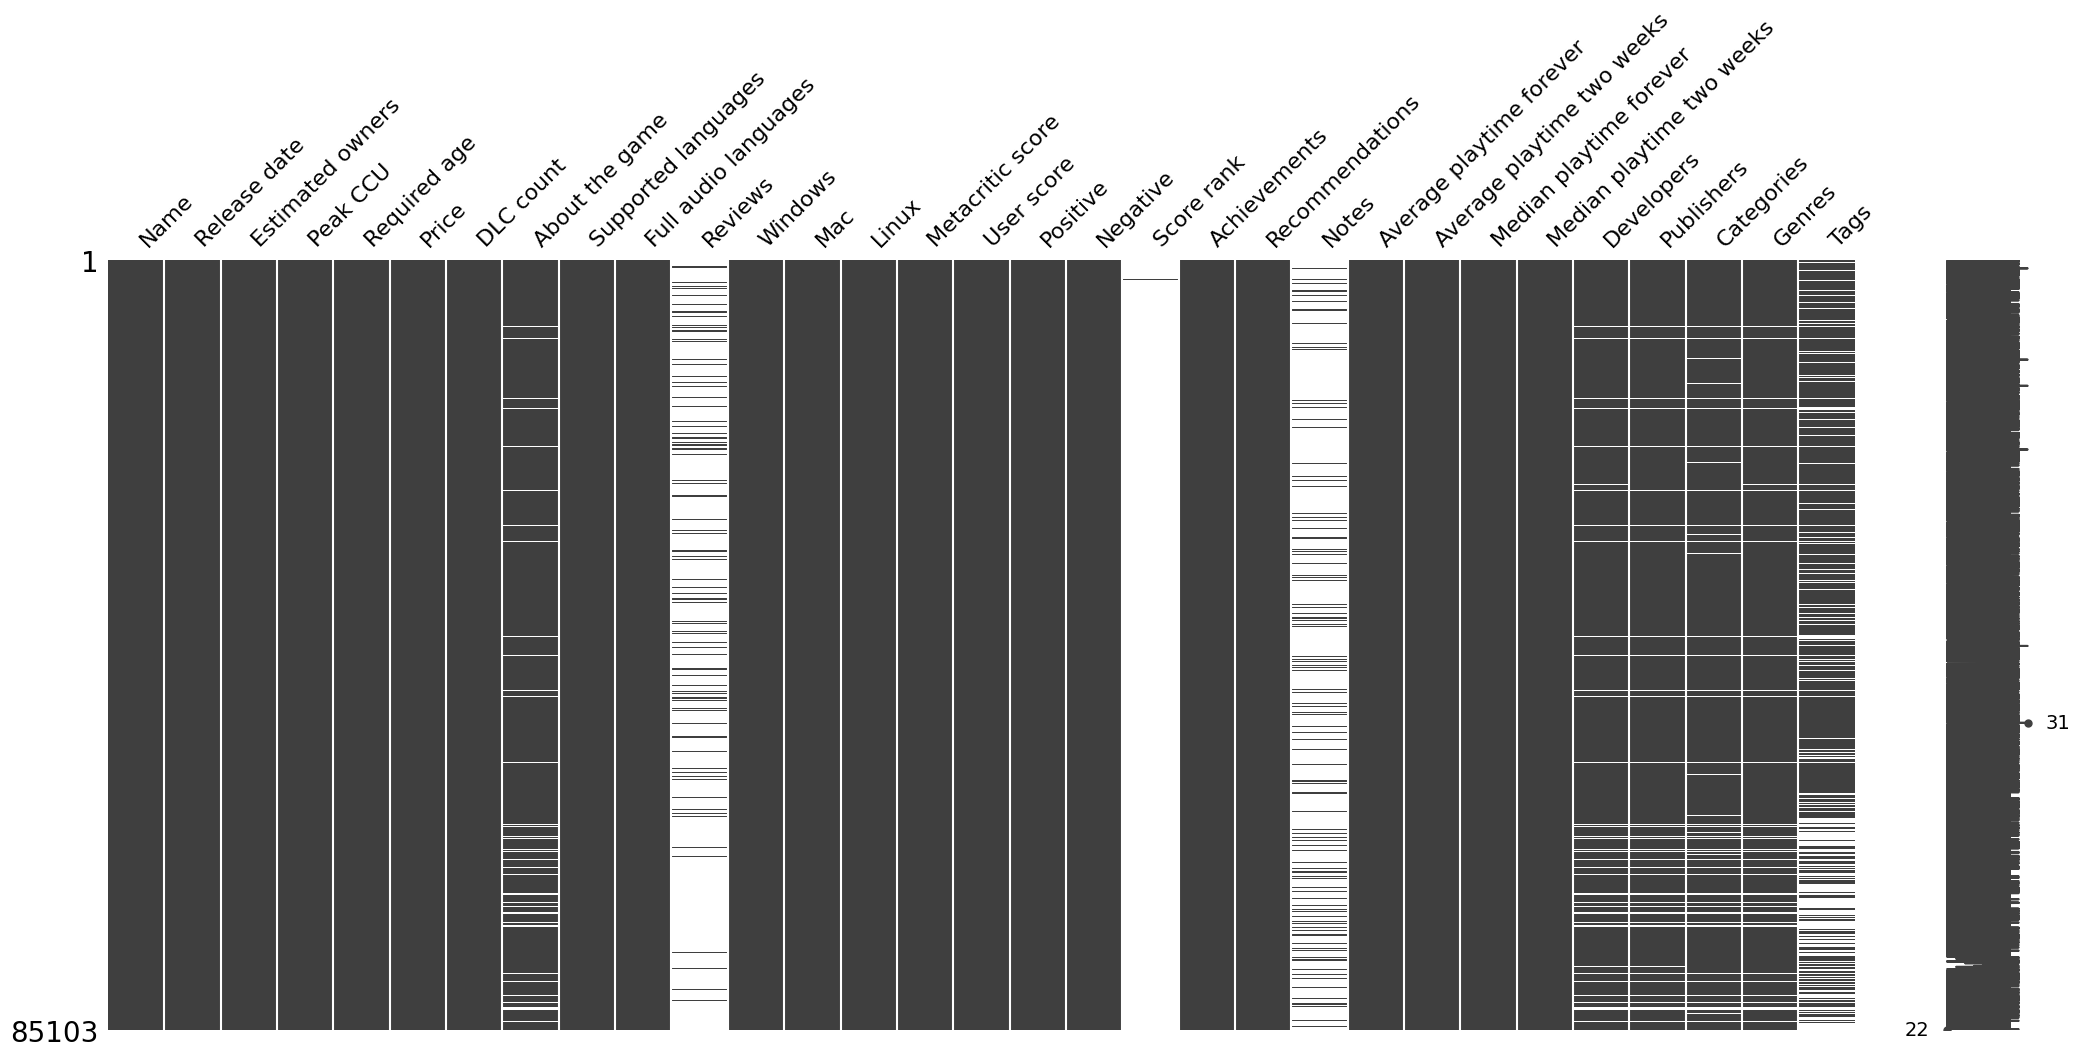

In [ ]:
ms.matrix(games)

In [ ]:
cores = ["#171a21","#66c0f4","#1b2838","#2a475e","#c7d5e0"]
display(cores)

['#171a21', '#66c0f4', '#1b2838', '#2a475e', '#c7d5e0']

### Resumo estatístico

In [ ]:
games.describe()

,Release date,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,85103,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,2020-04-28 18:59:51.666568960,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
min,1997-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2018-07-01 00:00:00,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,2020-12-18 00:00:00,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,2022-08-18 00:00:00,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2025-04-14 00:00:00,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000
std,NaN,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944


## Visualizações

{'whiskers': [<matplotlib.lines.Line2D at 0x7d13f90c8880>,
 'caps': [<matplotlib.lines.Line2D at 0x7d13f90c8dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d13f90c85e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d13f90c9300>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d13f90c95a0>],
 'means': []}

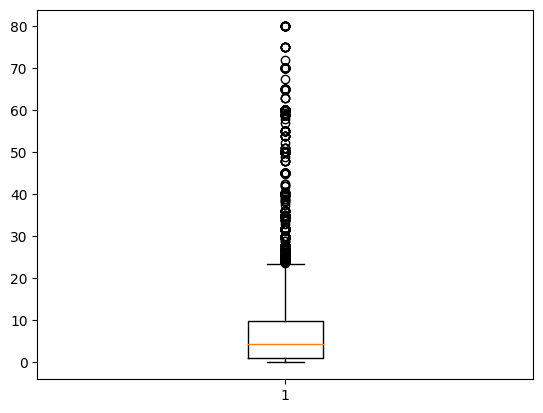

In [11]:
fig,ax = plt.subplots()
ax.boxplot(games[games["Price"]<80]["Price"])

In [29]:
teste = games["Estimated owners"].value_counts()
teste.index

Index(['0 - 20000', '0 - 0', '20000 - 50000', '50000 - 100000',
       '100000 - 200000', '200000 - 500000', '500000 - 1000000',
       '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000',
       '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000',
       '100000000 - 200000000'],
      dtype='object', name='Estimated owners')

Text(0.5, 1.0, 'Quantidade de donos estimados')

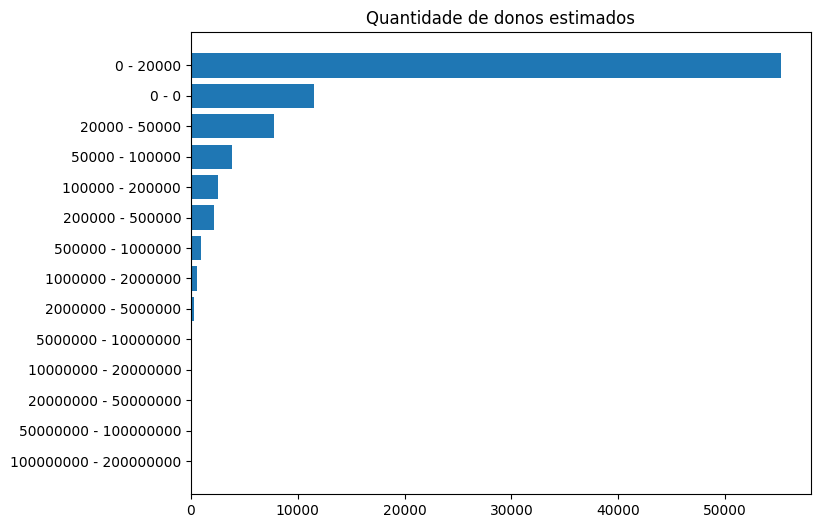

In [37]:
owners_count = games["Estimated owners"].value_counts(ascending = True)
fig,ax = plt.subplots(figsize = (8,6))
ax.barh(y=owners_count.index,width=owners_count)
plt.title("Quantidade de donos estimados")

# Pré-Processamento de Dados

### Tratamento dos dados

Dado que as colunas *Score rank*, *Reviews* e *Notes* apresentam no máximo 15% de valores não nulos, foram desconsideradas nas análises daqui para frente.

In [ ]:
games = games.drop(columns = ["Reviews", "Score rank","Notes"])

# Conclusão

In [ ]:
# Dicionário de Dados
descriptions ="""Identificador Único,string
Nome do Jogo,string
Data de Lançamento,string
Estimativa de Possuidores,string
Número de Usuários Atuais,int
Classificação indicativa,int
Preço em Dólares Americanos,float
Número de DLCs,int
Descrição detalhada dos jogos,string
Descrição curta dos jogos,string
Enumeração separada por vírgula das línguas suportadas, lista de strings
Enumeração separada por vírgula das línguas com suporte de aúdio, lista de strings
Imagem Principal na Loja,string
Website do Jogo,string
URL do Suporte do Jogo,string
Suporta Windows?,bool
Suporta Mac?,bool
Suporta Linux?,bool
Score do Metacritic,int
URL da review do Metecritic,string
Score do usuário,int
Votos Positivos,int
Votos negativos,int
Rank do score baseado nas reviews de usuários,string
Número de Conquistas,int
Recomendações de usuários,int
Informações extras,string
Tempo de jogo médio desde março de 2009 em minutos,int
Average playtime in the last two weeks, in minutes (int).
Median playtime since March 2009, in minutes (int).
Median playtime in the last two weeks, in minutes (int).
Available packages.
Package title (string).
Package description (string).
Subpackages.
Subpackage title (string).
Subpackage description (string).
Subpackage price in USD (float).
Game developers.
Developer name (string).
Game publishers.
Publisher name (string).
Game categories.
Category name (string).
Game genres.
Gender name (string).
Game screenshots.
Game screenshot URL,string.
Game movies.
Game movie URL,string.
Tags.
Tag key (string, int).
"""